# Mask NO-Mask Identification using open cv 

In [26]:
# Importing some neccasry libraries
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keras

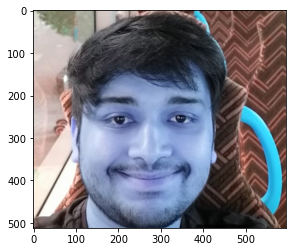

In [47]:
path = 'Mask_NoMask'
categories = ['mask' , 'no_mask']

input_image = []

for i in categories:
    folder = os.path.join(path , i)
    for image in os.listdir(folder):
        image_path = os.path.join(folder , image)
        image_array = cv2.imread(image_path)    # using cv2 i am reading reading image & store it in variable image_array
        plt.imshow(image_array)
        break

The above process is of reading and plotting an image , so in this way we can read each n every image and store it in a variable and then do resizing to make all images of same size as given in below code

In [49]:
image_size = 200

path = 'Mask_NoMask'
categories = ['mask' , 'no_mask']

input_image = []

for i in categories:
    folder = os.path.join(path , i)
    label = categories.index(i)
    for image in os.listdir(folder):
        image_path = os.path.join(folder , image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize( image_array , (image_size , image_size))
        input_image.append( [image_array , label]) # reading , storing and resizing images and then store it in list

In [50]:
np.random.shuffle(input_image)   # shuffling images both with and without masks

In [51]:
input_image[0]   # showing values and label of 1st random image

[array([[[ 16,  11,  12],
         [ 14,   8,  10],
         [ 13,   7,   9],
         ...,
         [  8,   5,   7],
         [  8,   5,   7],
         [  8,   5,   7]],
 
        [[ 16,  11,  12],
         [ 15,  10,  11],
         [ 13,   8,   9],
         ...,
         [  8,   5,   7],
         [  8,   5,   7],
         [  8,   5,   7]],
 
        [[ 16,  12,  12],
         [ 16,  12,  12],
         [ 14,   9,  10],
         ...,
         [  8,   5,   7],
         [  8,   5,   7],
         [  8,   5,   7]],
 
        ...,
 
        [[  8,   9,   5],
         [  7,   8,   4],
         [  7,   8,   4],
         ...,
         [137, 173, 228],
         [140, 175, 230],
         [141, 175, 231]],
 
        [[  8,   9,   6],
         [  8,   9,   6],
         [  7,   8,   5],
         ...,
         [134, 170, 226],
         [134, 171, 226],
         [135, 172, 226]],
 
        [[  8,   9,   7],
         [  8,   9,   7],
         [  7,   9,   6],
         ...,
         [131, 169, 223],
  

So this **'input_image'** contains image data with thier numeric values and their label( 0 or 1) at end

0 means with mask                                                           
1 means without masks

In [13]:
x = []  #empty list
y = []  #empty list

for values , label in input_image:
    x.append(values)
    y.append(label)

this 'x' contains numeric avlues of all images in 'x' list                     
'y' list contains label of each images in it (0 --> without mask & 1 --> with mask)

In [15]:
len(x)   # there are 8835 total images of mask and no-mask, 

8835

In [20]:
# converting list into array
x = np.array(x)  
y = np.array(y)

Now , we have to split the data into train and test                   
so we take 7100 images for training purpose and remaining for test

In [24]:
x_train = x[:7100]
x_test  = x[7100:]

y_train = y[:7100]
y_test  = y[7100:]

In [25]:
# Normalizing process, divide each image by biggest pixel as 255 (256 pixel but python strt with 0)
x_train = x_train / 255
x_test  = x_test / 255

### Now we will build a Nueral Network with multiple convolution and hidden layers

In [27]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Dropout , Flatten , Dense

In [28]:
model = Sequential()

model.add(Conv2D(filters = 15 , kernel_size = (6,6) , activation = 'relu'))   # 1st convolution layer
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 15 , kernel_size = (6,6) , activation = 'relu'))   # 2nd convolution layer
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128 , activation = 'relu' , input_shape = x.shape[1:]))       # 1st hidden layer
model.add(Dense(64 , activation = 'relu' ))                                   # 2nd hidden layer
model.add(Dense(64 , activation = 'relu'))                                    # 3rd hidden layer

model.add(Dense(2 , activation = 'softmax'))                                  # Output layer

In [29]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [30]:
model.fit(x_train , y_train , epochs = 20)
# there is huge no of images here so this model takes some hours to train (2 hrs approx. in my case)

Epoch 1/20
222/222 [==============================] - 517s 2s/step - loss: 0.5094 - accuracy: 0.7756
Epoch 2/20
222/222 [==============================] - 452s 2s/step - loss: 0.2969 - accuracy: 0.8827
Epoch 3/20
222/222 [==============================] - 494s 2s/step - loss: 0.2463 - accuracy: 0.9015
Epoch 4/20
222/222 [==============================] - 462s 2s/step - loss: 0.2094 - accuracy: 0.9203
Epoch 5/20
222/222 [==============================] - 450s 2s/step - loss: 0.1592 - accuracy: 0.9397
Epoch 6/20
222/222 [==============================] - 371s 2s/step - loss: 0.1268 - accuracy: 0.9525A: 33s - loss: 0.1285 - accuracy: 0. - ETA: 26s - loss: 0.
Epoch 7/20
222/222 [==============================] - 392s 2s/step - loss: 0.0799 - accuracy: 0.9682
Epoch 8/20
222/222 [==============================] - 391s 2s/step - loss: 0.0790 - accuracy: 0.9708
Epoch 9/20
222/222 [==============================] - 340s 2s/step - loss: 0.0604 - accuracy: 0.9777
Epoch 10/20
222/222 [============

In [31]:
model.save('Mask_Identification.h5')  # Saving model

Model has been builded , now its time of prediction

### Prediction

In [37]:
pred = model.predict(x_test)
pred

array([[3.9942279e-03, 9.9600583e-01],
       [3.8640661e-04, 9.9961358e-01],
       [4.9813662e-04, 9.9950182e-01],
       ...,
       [7.9480296e-06, 9.9999201e-01],
       [9.9999321e-01, 6.7502656e-06],
       [7.6906904e-11, 1.0000000e+00]], dtype=float32)

In [38]:
pred = np.argmax(pred,1)
pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

### Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
matrix = confusion_matrix(pred , y_test)
matrix

array([[820,  45],
       [109, 761]], dtype=int64)

In [41]:
accuracy = matrix.diagonal().sum() * 100 / matrix.sum()
accuracy

91.12391930835734

So, we got 91% accuracy on this model

### Now its time to build an window which access the camera and tells whether person in front of camera wear a mask or not

In [43]:
# from keras.models import load_model
# model=load_model("Mask_Idenfication.h5")

results={0:'Mask  found',1:'Mask not found '}
GR_dict={0:(0,255,255),1:(0,255,0)}

rect_size = 4
cap = cv2.VideoCapture(0) 


haarcascade = cv2.CascadeClassifier('Harcascade/haarcascade_frontalface_alt.xml')

while True:
    (rval, im) = cap.read()
    im=cv2.flip(im,1,1)  # flip image as mirror or inverted
    rerect_size = cv2.resize(im, (im.shape[1] // rect_size, im.shape[0] // rect_size))
    faces = haarcascade.detectMultiScale(rerect_size)
    for f in faces:
        (x, y, w, h) = [v * rect_size for v in f] 
        
        face_img = im[y:y+h, x:x+w]
        rerect_sized=cv2.resize(face_img,(200,200))
        normalized=rerect_sized/255.0
        reshaped=np.reshape(normalized,(1,200,200,3))
        reshaped = np.vstack([reshaped])
        result=model.predict(reshaped)

        
        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(im,(x,y),(x+w,y+h),GR_dict[label],2)
        cv2.rectangle(im,(x,y-40),(x+w,y),GR_dict[label],-1)
        cv2.putText(im, results[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,0,0),2)  # font of mask found or not found

    cv2.imshow('Live Camera',   im)
    key = cv2.waitKey(10)
    
    if key == 27: # use the escape key to close the window
        break

cap.release()

cv2.destroyAllWindows()
